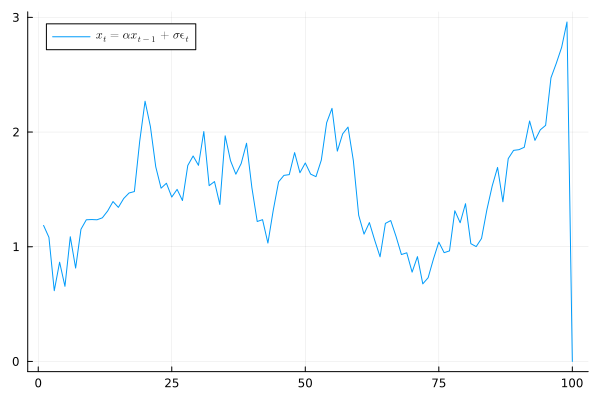

In [1]:
## Lecture 2: Question 8
##
using Plots, LaTeXStrings
x_0 = 1.0
T = 100
ϵ = randn(T)
x = zeros(T)
x_T = 0.0
α = 1.0
σ = 0.2

for t in 1:T
    if t == 1
        x[t] = α * x_0 + σ * ϵ[t]
    elseif t < T
        x[t] = α * x[t-1] + σ * ϵ[t]
    else
        x[t] = x_T
    end
end

plot(x, label = L"x_t = α x_{t-1} + σ ϵ_t")

## Atkinson Index used to measure inequality
$$A_{\epsilon} = 
\begin{cases}
1- \frac{ (\frac{1}{n} \sum x_i^{1-\epsilon} )}{ \frac{1}{n} \sum x_i } & \epsilon \neq 1 \\
1 - \frac{ ( \prod x_i)^{\frac{1}{n}}}{ \frac{1}{n} \sum x_i} & \epsilon = 1
\end{cases}$$
### Code to generate an Atkinson Index:

val = 68.64113533839127
num = 0.47116054605433466
val = 49.71381353183476
den = 0.4971381353183476
A = 0.947745732184923


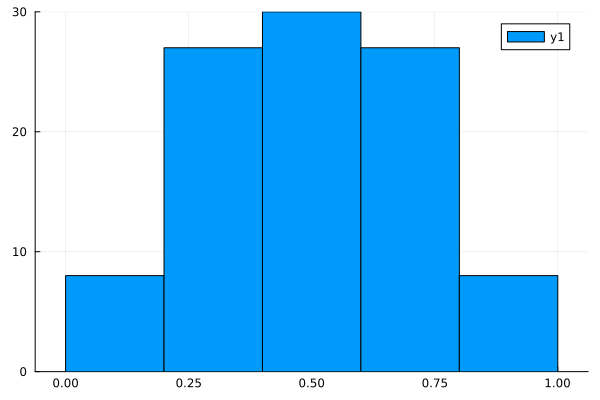

In [2]:
using LaTeXStrings, Plots, Statistics, LinearAlgebra, Distributions 

n = 100 ## Population size
#distribution = Chisq(3) ## Distribution of incomes
distribution = LogitNormal() ## Distribution of income
x = rand(distribution, n) ## Vector of incomes
ϵ = 0.5 ## Inequality aversion parameter
val = 0.0 ## Initialise val

for i in 1:n
    if i == 1
        val = x[i]^(1-ϵ)
    else
    val += x[i]^(1-ϵ)
    end
end

@show val

num = (1/n*val)^(1/(1-ϵ))

@show num

for i in 1:n
    if i == 1
        val = x[i]
    else
        val += x[i]
    end
end

@show val

den = 1/n*val

@show den

A = num/den

@show A

histogram(x)


In [4]:
## Visualising what Eaton et al., (2011) are writting about
##
## Packages
##
using LaTeXStrings, Plots, Statistics, LinearAlgebra, Distributions

## Setting up initial parameters
##
N = 100 ## number of countries that French firms sell to
firm_count = Uniform(0, 10) ## randomly assign the number of firms (total and French) in each country
N_nf = round.(Int, rand(firm_count, N)) ## number of French firms in each of the countries
total_exports = Pareto(1, 2) ## distribution of total exports from French firms to countries
X_nf = rand(total_exports, N) ## total exports of French firms to countries
X_n = rand(total_exports, N)  + X_nf ## total manufacturing absorption (total production less exports plus imports (X_nf))
π_nf = X_nf ./ X_n
ρ = X_nf ./ π_nf

100-element Vector{Float64}:
   6.318187295295331
   8.975811278189582
   8.78134632763657
   7.68803571190452
   6.457830078148375
  17.941553882573974
   5.246352518471209
  10.534392979288668
  12.274338450223198
   9.560441408049623
   6.143172761338058
   5.140103558468855
 624.0014311380436
   ⋮
  22.506786717791858
  15.060230485460691
   6.7438822570514025
  24.147415437698676
  14.272774348521185
   4.877581234548989
  11.50543812062266
   4.775726307518401
   9.872788384589892
  29.14169061494075
  37.39322294314134
   4.970494692829439

## Understanding sales distibutions in Eaton et al., (2011)
Denote the rank, in terms of sales, of French firm $j$ in market $n$, among $N_{nF}$ French firms selling there, as $r_n(j)$, with the largest firm having rank 1.
For each firm, $j$, we calculate
$$\frac{r_n(j) - 0.5}{N_{nF}}$$

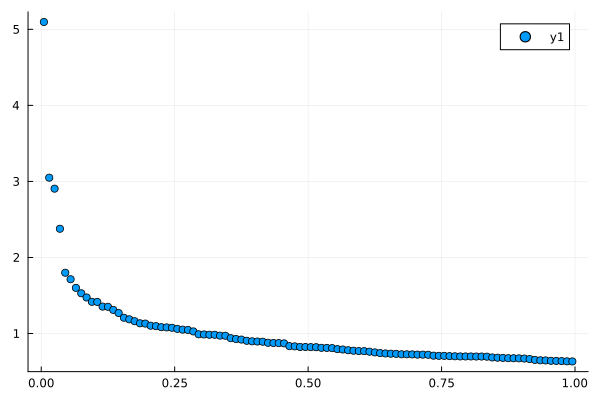

In [65]:
## For example,
##
N_nF = 100 ## total number of French firms
distribution = Pareto(3) ## distibution of firm sales
sales = sort(rand(distribution, N), rev = true) ## sales
y = sales./mean(sales)
r_n = collect(1:N)
x = (r_n.-0.5)./N_nF
scatter(x, y)